In [1]:
from datetime import datetime
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from riak import RiakClient

client = RiakClient()

table = "WaterMeterMonthlyRollUp"

def convert_to_epoch ( date_to_convert ):
    return calendar.timegm(datetime.timetuple( date_to_convert )) * 1000

def ts_obj_to_list_of_lists (ts_obj):
    list_to_return = []
    for row in ts_obj.rows:
        list = []
        for i in range(len(row)):
            list.append(row[i])
        list_to_return.append(list)
    return list_to_return

start_date = datetime(2016, 1, 1, 0, 00)
end_date = datetime(2017, 2, 1, 0, 00)

query = """\
    SELECT reading_date, total_gallons
    FROM WaterMeterMonthlyRollUp
    WHERE reading_date >= {} AND reading_date < {} AND
        customer_id = 'CUSTOMER-0001' AND meter_id = 'METER-0001'
""".format( convert_to_epoch( start_date ), convert_to_epoch( end_date ) )

data_set = client.ts_query(table, query)

boring_list = ts_obj_to_list_of_lists( data_set )
df = pd.DataFrame( boring_list )
df.columns = ['Date','Gallons']
df.set_index('Date', False, False, True, True)

print df
print '\n'
print df.describe()

                 Date  Gallons
Date                          
2016-02-01 2016-02-01   3756.0
2016-03-01 2016-03-01   3552.5
2016-04-01 2016-04-01   3798.5
2016-05-01 2016-05-01   3657.0
2016-06-01 2016-06-01   3758.5
2016-07-01 2016-07-01   4995.5
2016-08-01 2016-08-01   5762.5
2016-09-01 2016-09-01   6128.5
2016-10-01 2016-10-01   3675.5
2016-11-01 2016-11-01   3780.0
2016-12-01 2016-12-01   3634.0
2017-01-01 2017-01-01   3798.5


           Gallons
count    12.000000
mean   4191.416667
std     904.176115
min    3552.500000
25%    3670.875000
50%    3769.250000
75%    4097.750000
max    6128.500000


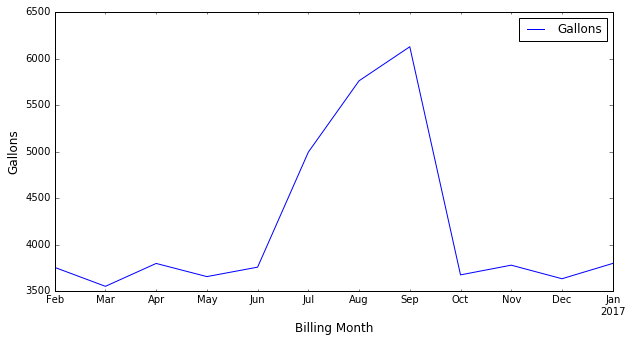

In [12]:
%matplotlib inline
import matplotlib as plt

ax = df.plot(figsize=(10,5))
ax.set_ylabel('Gallons', fontsize=12)
ax.set_xlabel('Billing Month', fontsize=12)

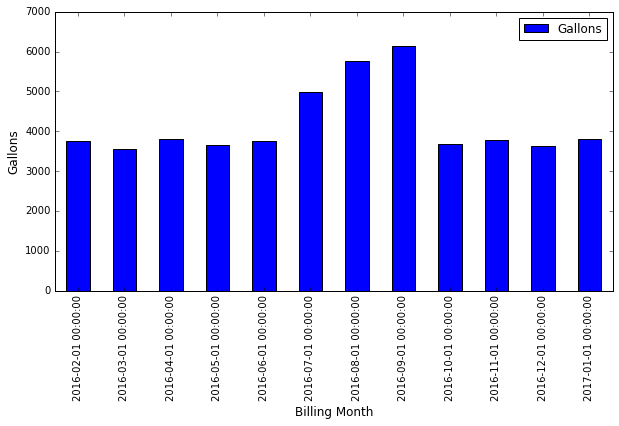

In [14]:
ax = df.plot(figsize=(10,5), kind='bar')
ax.set_ylabel('Gallons', fontsize=12)
ax.set_xlabel('Billing Month', fontsize=12)